In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
plt.rcParams.update({'figure.figsize':(6,4),'figure.dpi':60})

In [2]:
pth = r"/Users/christianugwu/Downloads/Aqua_Data_Clarias.xlsx"

In [3]:
concrete_data = pd.read_excel(pth, sheet_name='ConcreteData')

In [4]:
concrete_data.head()

,Dissolve_oxygen,Temperature,PH,Feed_intake,Fish_meal,Blood_meal,Palm_kernel_cake,Water_fern,Wheat_meal,Mopane_worm,Soya_bean_meal,Yellow_maize,Soya_bean_oil,Starch,Vitamin,Methionine,Lysine,Groundnut_cake,Weight_gain
0,5.16,26.7,7.13,24.473333,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9,16.453333
1,4.81,26.8,7.12,50.473333,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9,40.453333
2,4.92,26.7,7.11,122.453333,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9,105.453333
3,4.18,26.8,7.02,184.453333,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9,170.453333
4,5.56,26.3,7.04,254.080000,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9,248.080000


In [5]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dissolve_oxygen   39 non-null     float64
 1   Temperature       39 non-null     float64
 2   PH                39 non-null     float64
 3   Feed_intake       39 non-null     float64
 4   Fish_meal         39 non-null     float64
 5   Blood_meal        39 non-null     float64
 6   Palm_kernel_cake  39 non-null     int64  
 7   Water_fern        39 non-null     int64  
 8   Wheat_meal        39 non-null     int64  
 9   Mopane_worm       39 non-null     int64  
 10  Soya_bean_meal    39 non-null     float64
 11  Yellow_maize      39 non-null     float64
 12  Soya_bean_oil     39 non-null     int64  
 13  Starch            39 non-null     int64  
 14  Vitamin           39 non-null     int64  
 15  Methionine        39 non-null     int64  
 16  Lysine            39 non-null     int64  
 17 

In [6]:
concrete_data.describe()

,Dissolve_oxygen,Temperature,PH,Feed_intake,Fish_meal,Blood_meal,Palm_kernel_cake,Water_fern,Wheat_meal,Mopane_worm,Soya_bean_meal,Yellow_maize,Soya_bean_oil,Starch,Vitamin,Methionine,Lysine,Groundnut_cake,Weight_gain
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.0,39.0,39.000000,39.000000,39.000000,39.000000
mean,5.099487,26.753846,7.087949,368.050456,3.633333,10.833333,4.333333,3.000000,6.333333,6.666667,16.600000,25.300000,5.333333,2.0,2.0,3.333333,3.333333,7.300000,345.530712
std,0.343434,0.501496,0.046122,221.689394,5.205480,15.520925,6.208370,4.298102,9.073772,9.551339,13.568617,0.894721,0.477567,0.0,0.0,2.387835,2.387835,10.458716,207.554623
min,4.180000,26.100000,7.020000,24.353333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.400000,5.000000,2.0,2.0,0.000000,0.000000,0.000000,16.353333
25%,4.825000,26.400000,7.040000,184.403333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.400000,5.000000,2.0,2.0,0.000000,0.000000,0.000000,170.403333
50%,5.170000,26.700000,7.110000,394.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,25.000000,5.000000,2.0,2.0,5.000000,5.000000,0.000000,385.260000
75%,5.330000,27.050000,7.130000,556.985000,10.900000,32.500000,13.000000,9.000000,19.000000,20.000000,32.800000,26.500000,6.000000,2.0,2.0,5.000000,5.000000,21.900000,519.655000
max,6.020000,27.800000,7.160000,696.455556,10.900000,32.500000,13.000000,9.000000,19.000000,20.000000,32.800000,26.500000,6.000000,2.0,2.0,5.000000,5.000000,21.900000,636.088889


In [7]:
def boxplot(column):
    sns.boxplot(data=concrete_data,x= concrete_data[f"{column}"])
    plt.title(f"Boxplot of Concrete Data {column}")
    plt.show()

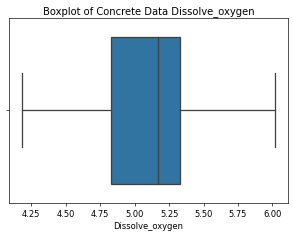

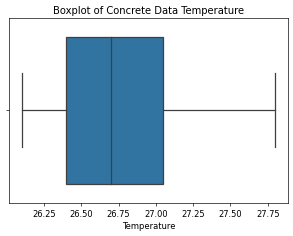

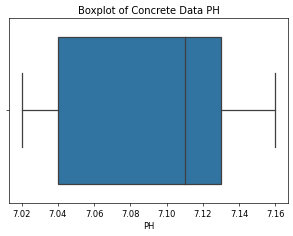

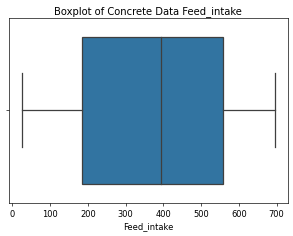

In [8]:
boxplot('Dissolve_oxygen')
boxplot('Temperature')
boxplot('PH')
boxplot('Feed_intake')

In [9]:
def histgram(column):
    #sns.histplot(data2["price"],kde=True)
    sns.histplot(data= concrete_data,x=concrete_data[f"{column}"], kde = True)
    plt.title(f"Histgram plot of Concrete Data {column}")
    plt.show()

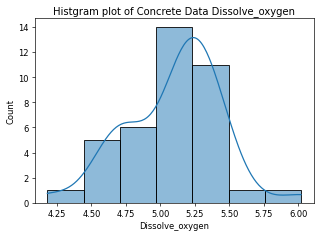

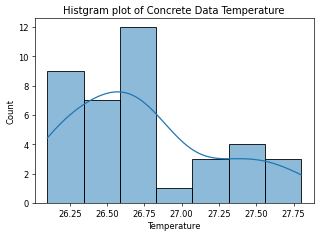

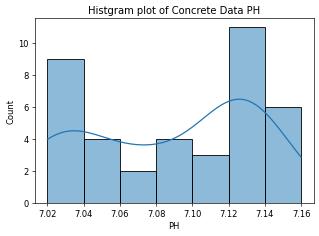

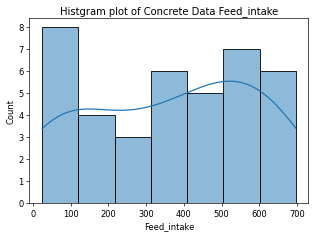

In [10]:
histgram('Dissolve_oxygen')
histgram('Temperature')
histgram('PH')
histgram('Feed_intake')

In [11]:
# skewness along the index axis 
concrete_data.skew(axis = 0, skipna = True) 

Dissolve_oxygen    -0.277154
Temperature         0.667939
PH                 -0.273728
Feed_intake        -0.168488
Fish_meal           0.735711
Blood_meal          0.735711
Palm_kernel_cake    0.735711
Water_fern          0.735711
Wheat_meal          0.735711
Mopane_worm         0.735711
Soya_bean_meal     -0.046582
Yellow_maize        0.489357
Soya_bean_oil       0.735711
Starch              0.000000
Vitamin             0.000000
Methionine         -0.735711
Lysine             -0.735711
Groundnut_cake      0.735711
Weight_gain        -0.282808
dtype: float64

In [12]:
# Calculate the correlation matrix
correlation_matrix = concrete_data.corr()
correlation_matrix

,Dissolve_oxygen,Temperature,PH,Feed_intake,Fish_meal,Blood_meal,Palm_kernel_cake,Water_fern,Wheat_meal,Mopane_worm,Soya_bean_meal,Yellow_maize,Soya_bean_oil,Starch,Vitamin,Methionine,Lysine,Groundnut_cake,Weight_gain
Dissolve_oxygen,1.000000,0.293681,0.346324,-0.129262,-0.674423,0.257789,0.257789,0.257789,0.416634,0.416634,-0.529294,0.422385,-0.674423,NaN,NaN,0.674423,0.674423,-0.674423,-0.120099
Temperature,0.293681,1.000000,0.264303,-0.160846,-0.296673,-0.131855,-0.131855,-0.131855,0.428528,0.428528,-0.086087,-0.010557,-0.296673,NaN,NaN,0.296673,0.296673,-0.296673,-0.175536
PH,0.346324,0.264303,1.000000,0.125502,-0.099561,-0.159298,-0.159298,-0.159298,0.258859,0.258859,0.039948,-0.095655,-0.099561,NaN,NaN,0.099561,0.099561,-0.099561,0.138697
Feed_intake,-0.129262,-0.160846,0.125502,1.000000,0.015941,-0.033522,-0.033522,-0.033522,0.017582,0.017582,0.028922,-0.031944,0.015941,NaN,NaN,-0.015941,-0.015941,0.015941,0.995805
Fish_meal,-0.674423,-0.296673,-0.099561,0.015941,1.000000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,0.855273,-0.720577,1.000000,NaN,NaN,-1.000000,-1.000000,1.000000,0.010579
Blood_meal,0.257789,-0.131855,-0.159298,-0.033522,-0.500000,1.000000,1.000000,1.000000,-0.500000,-0.500000,-0.876391,0.960769,-0.500000,NaN,NaN,0.500000,0.500000,-0.500000,-0.016545
Palm_kernel_cake,0.257789,-0.131855,-0.159298,-0.033522,-0.500000,1.000000,1.000000,1.000000,-0.500000,-0.500000,-0.876391,0.960769,-0.500000,NaN,NaN,0.500000,0.500000,-0.500000,-0.016545
Water_fern,0.257789,-0.131855,-0.159298,-0.033522,-0.500000,1.000000,1.000000,1.000000,-0.500000,-0.500000,-0.876391,0.960769,-0.500000,NaN,NaN,0.500000,0.500000,-0.500000,-0.016545
Wheat_meal,0.416634,0.428528,0.258859,0.017582,-0.500000,-0.500000,-0.500000,-0.500000,1.000000,1.000000,0.021118,-0.240192,-0.500000,NaN,NaN,0.500000,0.500000,-0.500000,0.005965
Mopane_worm,0.416634,0.428528,0.258859,0.017582,-0.500000,-0.500000,-0.500000,-0.500000,1.000000,1.000000,0.021118,-0.240192,-0.500000,NaN,NaN,0.500000,0.500000,-0.500000,0.005965


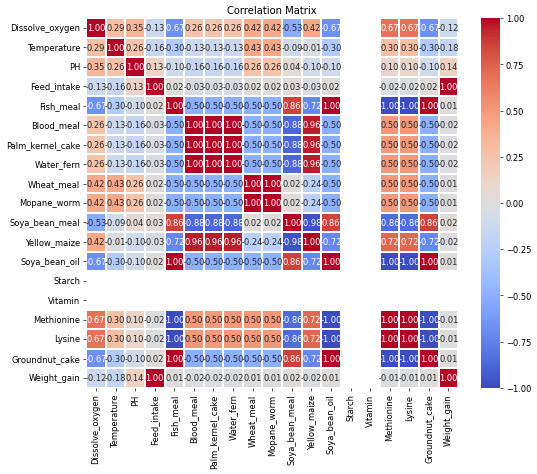

In [13]:
# plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix') 
# displaying heatmap 
plt.show() 

### Descriptive Analysis Inference
1. The highest weight gain is 636.088889.
2. The lowest weight gain is 16.353333.
3. The total number of observations is 39 with no missing value.
4. Most of the weight fall in the range of 0 to 100.
5. Average weight is 345.530712
6. The temperature ranges from 25 to 27 and the median was 26.4
7. Most of the temperature fall in the range of 26.4 and 26.7.
8. From above box plot its clear that there is no outlier in 'Weight_gain'  and 'temperature' data
9. There is high correlation between weight_gain and feed intake which is 0.9997.
10. The highest feed intake was 696.455556 and the lowest was 24.353333
11. Average dissolve oxygen was 5.09, the highest was 6.02 and lowest was 4.18

### Predictive Analysis

In [14]:
features = concrete_data.drop(['Weight_gain'], axis =1)
features.head()

,Dissolve_oxygen,Temperature,PH,Feed_intake,Fish_meal,Blood_meal,Palm_kernel_cake,Water_fern,Wheat_meal,Mopane_worm,Soya_bean_meal,Yellow_maize,Soya_bean_oil,Starch,Vitamin,Methionine,Lysine,Groundnut_cake
0,5.16,26.7,7.13,24.473333,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9
1,4.81,26.8,7.12,50.473333,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9
2,4.92,26.7,7.11,122.453333,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9
3,4.18,26.8,7.02,184.453333,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9
4,5.56,26.3,7.04,254.080000,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9


In [15]:
label = concrete_data[['Weight_gain']]
label.head()

,Weight_gain
0,16.453333
1,40.453333
2,105.453333
3,170.453333
4,248.080000


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(features, label, test_size =0.2, random_state = 42) 

print('X_train dimension', X_train.shape)
print('X_test dimension', X_test.shape)
print('y_train dimension', y_train.shape)
print('y_test dimension', y_test.shape)

X_train dimension (31, 18)
X_test dimension (8, 18)
y_train dimension (31, 1)
y_test dimension (8, 1)


In [17]:
X_text_df = pd.DataFrame(X_test)
y_text_df = pd.DataFrame(y_test)
y_text_df

,Weight_gain
33,452.050000
36,569.050000
4,248.080000
13,16.453333
30,228.150000
26,16.353333
6,385.260000
27,40.353333


#### Linear Regression

In [18]:
from sklearn import linear_model
model_reg = linear_model.LinearRegression()
# Train the Linear regression model
model_reg.fit(X_train, y_train)

LinearRegression()

In [19]:
# Make predictions on the test set
y_pred = model_reg.predict(X_test)

In [20]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
# Print the model coefficients and evaluation metrics
print(f'Coefficients: {model_reg.coef_}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Coefficients: [[-2.67412321e+00 -8.67456581e+00  1.40265754e+02  9.21305738e-01
  -1.86343578e-02  1.81271364e-01  7.25085454e-02  5.01982237e-02
  -7.34921198e-02 -7.73601261e-02 -1.21830138e-01  9.39211509e-03
  -1.70957411e-03  0.00000000e+00  0.00000000e+00  8.54787055e-03
   8.54787055e-03 -3.74396730e-02]]
Mean Squared Error: 176.48601608030435
R-squared: 0.995506907360934


In [21]:
# print the real values
actual_weight = y_text_df
actual_weight_gain=actual_weight.reset_index()
to_predict = X_text_df
# we call the predict method
predictions = model_reg.predict(to_predict)
# print the predictions
predicted = pd.DataFrame(predictions)
#print(predicted)
predicted.rename(columns={0:'Linear Regression Prediction'}, inplace=True)
Result = pd.concat([actual_weight_gain,predicted], axis =1, join='inner')
result = Result.drop('index',axis = 1)
print(result)

   Weight_gain  Linear Regression Prediction
0   452.050000                    442.171993
1   569.050000                    557.200413
2   248.080000                    231.327806
3    16.453333                     35.927637
4   228.150000                    209.557666
5    16.353333                     13.440199
6   385.260000                    376.866494
7    40.353333                     49.808687


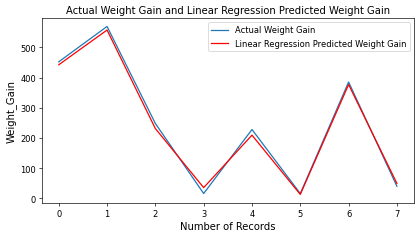

In [22]:

plt.figure(figsize =(8,4))
plt.title('Actual Weight Gain and Linear Regression Predicted Weight Gain')
plt.xlabel('Number of Records', fontsize = 12)
plt.ylabel('Weight_Gain', fontsize = 12)
plt.plot(Result['Weight_gain'])
plt.plot(Result['Linear Regression Prediction'],'r')
plt.legend(['Actual Weight Gain','Linear Regression Predicted Weight Gain'], loc = 'upper right')
plt.show()

In [23]:
# Create and train the Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=30)
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the regression metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1382.627231944445
R-squared: 0.9648002013054954


In [24]:
# print the real values
actual_weight = y_text_df
actual_weight_gain=actual_weight.reset_index()
to_predict = X_text_df
# we call the predict method
predictions = regressor.predict(to_predict)
# print the predictions
predicted = pd.DataFrame(predictions)
predicted.rename(columns={0:'Descision Tree Regressor Prediction'}, inplace=True)
# print(predicted)
Result = pd.concat([actual_weight_gain,predicted], axis =1, join='inner')
result = Result.drop('index',axis = 1)
print(result)

   Weight_gain  Descision Tree Regressor Prediction
0   452.050000                           443.260000
1   569.050000                           538.710000
2   248.080000                           170.453333
3    16.453333                            16.453333
4   228.150000                           170.353333
5    16.353333                            16.453333
6   385.260000                           374.050000
7    40.353333                            16.453333


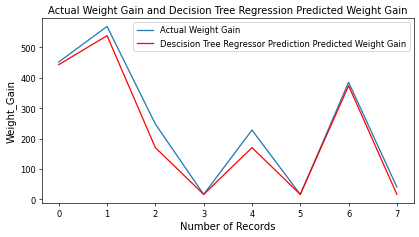

In [25]:
# visualize result of Decision Tree Regressor prediction
plt.figure(figsize =(8,4))
plt.title('Actual Weight Gain and Decision Tree Regression Predicted Weight Gain')
plt.xlabel('Number of Records', fontsize = 12)
plt.ylabel('Weight_Gain', fontsize = 12)
plt.plot(Result['Weight_gain'])
plt.plot(Result['Descision Tree Regressor Prediction'],'r')
plt.legend(['Actual Weight Gain','Descision Tree Regressor Prediction Predicted Weight Gain'], loc = 'upper right')
plt.show()

In [26]:
# Create and train the K-Nearest Neighbors Regression model
knn_reg = KNeighborsRegressor(n_neighbors=5) 
knn_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the regression metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 496.67621350000013
R-squared: 0.9873553027688006


In [27]:
# print the real values
actual_weight = y_text_df
actual_weight_gain=actual_weight.reset_index()
to_predict = X_text_df
# we call the predict method
predictions = knn_reg.predict(to_predict)
# print the predictions
predicted = pd.DataFrame(predictions)
predicted.rename(columns={0:'KNN Regressor Prediction'}, inplace=True)
# print(predicted)
Result = pd.concat([actual_weight_gain,predicted], axis =1, join='inner')
result = Result.drop('index',axis = 1)
print(result)

   Weight_gain  KNN Regressor Prediction
0   452.050000                458.598000
1   569.050000                558.956000
2   248.080000                231.936000
3    16.453333                 56.833333
4   228.150000                231.936000
5    16.353333                 56.833333
6   385.260000                381.666000
7    40.353333                 56.833333


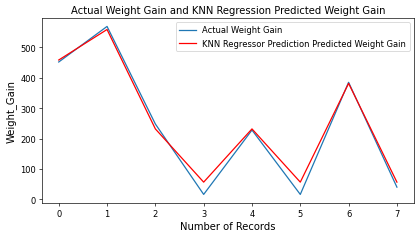

In [28]:
# visualize result of Decision Tree Regressor prediction
plt.figure(figsize =(8,4))
plt.title('Actual Weight Gain and KNN Regression Predicted Weight Gain')
plt.xlabel('Number of Records', fontsize = 12)
plt.ylabel('Weight_Gain', fontsize = 12)
plt.plot(Result['Weight_gain'])
plt.plot(Result['KNN Regressor Prediction'],'r')
plt.legend(['Actual Weight Gain','KNN Regressor Prediction Predicted Weight Gain'], loc = 'upper right')
plt.show()

In [29]:
import warnings
warnings.filterwarnings("ignore")
# Create and train the MLP Regression model
ann_reg = MLPRegressor(hidden_layer_sizes= (50,), random_state=42,
                       alpha = 0.0005, activation = 'relu', 
                       solver = 'adam', max_iter= 10000)

ann_reg.fit(X_train, y_train)


MLPRegressor(alpha=0.0005, hidden_layer_sizes=(50,), max_iter=10000,
             random_state=42)

In [30]:
# Make predictions on the test set
y_pred = ann_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the regression metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 62.93456254294616
R-squared: 0.9983977720955757


In [31]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
pred_train= ann_reg.predict(X_train)
print('mean_squared_error for Training: ',np.sqrt(mean_squared_error(y_train,pred_train)))
pred= ann_reg.predict(X_test)
print('mean_squared_error for Testing: ', np.sqrt(mean_squared_error(y_test,pred)))

mean_squared_error for Training:  14.77472915955846
mean_squared_error for Testing:  7.933130689894511


In [32]:
# print the real values
actual_weight = y_text_df
actual_weight_gain=actual_weight.reset_index()
to_predict = X_text_df
# we call the predict method
predictions = ann_reg.predict(to_predict)
# print the predictions
predicted = pd.DataFrame(predictions)
predicted.rename(columns={0:'ANN Prediction'}, inplace=True)
# print(predicted)
Result = pd.concat([actual_weight_gain,predicted], axis =1, join='inner')
result = Result.drop('index',axis = 1)
print(result)

   Weight_gain  ANN Prediction
0   452.050000      448.902696
1   569.050000      549.776451
2   248.080000      237.844323
3    16.453333       14.777565
4   228.150000      228.615600
5    16.353333       13.497641
6   385.260000      387.227354
7    40.353333       38.842786


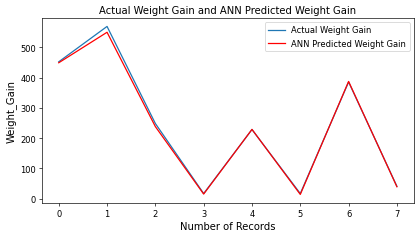

In [33]:
# visualize result of ANN prediction
plt.figure(figsize =(8,4))
plt.title('Actual Weight Gain and ANN Predicted Weight Gain')
plt.xlabel('Number of Records', fontsize = 12)
plt.ylabel('Weight_Gain', fontsize = 12)
plt.plot(Result['Weight_gain'])
plt.plot(Result['ANN Prediction'],'r')
plt.legend(['Actual Weight Gain','ANN Predicted Weight Gain'], loc = 'upper right')
plt.show()

In [34]:
# Save
import pickle
pickle_out = open("ANN_Clarias_Con_ext.pkl","wb")
pickle.dump(ann_reg, pickle_out)
pickle_out.close()